# Decoding visualization

### Load data

In [1]:
import os
import pickle

In [2]:
res_path = r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\E22\Projet_Ivado_rainvillelab\results_decoding\model_SVC_2folds'

In [3]:
os.chdir(res_path)
with open('final_results.pickle', 'rb') as handle:
        final_results = pickle.load(handle)


### final_results content
- decision_function : is a (Y_test.shape[0], nb. classes) dim array. It gives the distance of each sample to the hyperplane 

In [4]:
final_results

{'df_all_metrics':              accuracy balanced_accuracy precision
 fold1        0.357143          0.358548  0.357923
 fold2        0.344907          0.345142  0.348562
 final_model  0.392233          0.392652  0.394624,
 'Y_pred': array([2, 1, 2, 1, 2, 1, 1, 3, 1, 1, 3, 4, 2, 1, 4, 2, 2, 4, 3, 1, 2, 1,
        3, 3, 1, 3, 1, 2, 2, 4, 3, 3, 4, 2, 4, 1, 2, 3, 2, 3, 3, 3, 3, 1,
        2, 2, 3, 2, 2, 4, 1, 2, 3, 4, 3, 3, 4, 1, 1, 2, 2, 3, 3, 1, 2, 4,
        2, 1, 4, 4, 1, 4, 4, 4, 2, 1, 1, 4, 2, 3, 1, 2, 4, 1, 1, 3, 2, 3,
        1, 4, 1, 1, 4, 2, 2, 3, 4, 4, 1, 2, 1, 2, 2, 4, 4, 3, 1, 4, 2, 2,
        2, 1, 1, 3, 3, 4, 1, 4, 2, 1, 3, 4, 3, 4, 2, 2, 3, 1, 1, 3, 1, 1,
        2, 2, 1, 2, 1, 4, 3, 1, 4, 2, 1, 4, 2, 4, 4, 4, 4, 4, 1, 2, 1, 1,
        1, 2, 2, 3, 3, 4, 3, 3, 2, 4, 1, 4, 4, 4, 2, 3, 3, 4, 3, 4, 2, 4,
        3, 4, 3, 3, 4, 3, 3, 4, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2, 4, 2, 3, 1,
        2, 3, 3, 2, 1, 2, 3, 4, 3, 2, 2, 2, 4, 3, 2, 1, 2, 3, 3, 4, 2, 1,
        4, 3, 4, 4, 2, 1, 3

In [36]:
final_results['decision_function'].shape

(1716, 4)

In [5]:
classes = ['N_HYPO', 'HYPO', 'N_HYPER', 'HYPER']

### Confusion matrix

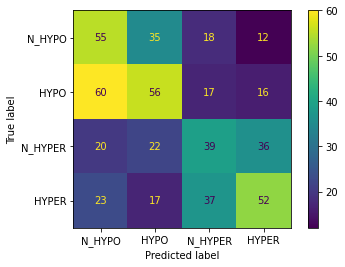

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = final_results['confusion_matrix']
#['HYPO_N', 'HYPO', 'HYPER_N', 'HYPER']

cm_display = ConfusionMatrixDisplay(cm, display_labels =  classes).plot()

In [20]:
# print sum of each row
for i in range(cm.shape[1]):
    print(cm[i, :].sum())
    

120
149
117
129


## KHI2 on confusion matrix 

In [25]:
from scipy.stats import chisquare
import numpy as np

# Expected frequencies

df_exp_f = np.zeros(cm.shape) # create a dataframe for expected frequencies
for i in range(cm.shape[1]):
    row = cm[i, :]
    exp = row.sum()/cm.shape[0] # get column's expected probability
    exp_col = np.full((cm.shape[0]),exp) # create row vector with 'exp' as values
    df_exp_f[i,:] = exp_col # replace exp_col in the df_exp_f
print('dataframe of expected frequencies : \n{}'.format(df_exp_f))
    
ddof = 3 # ddof id (4-1)(4-1) = 9
chi2_results = chisquare(cm, f_exp = df_exp_f, ddof = ddof, axis = None) 

dataframe of expected frequencies : 
[[30.   30.   30.   30.  ]
 [37.25 37.25 37.25 37.25]
 [29.25 29.25 29.25 29.25]
 [32.25 32.25 32.25 32.25]]


### Results

In [27]:
print('Khi2 statistic = {:f} and p value = {:f} for degree of freedom = {:f}'.format(chi2_results[0],chi2_results[1],ddof))

Khi2 statistic = 115.918583 and p value = 0.000000 for degree of freedom = 3.000000


## Coefficients onto 3D space

C:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\nilearn\plotting\img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


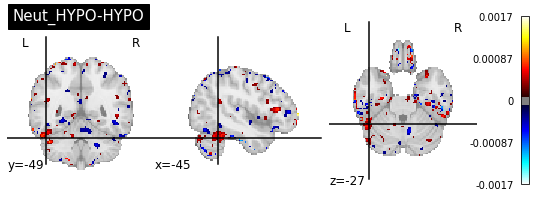

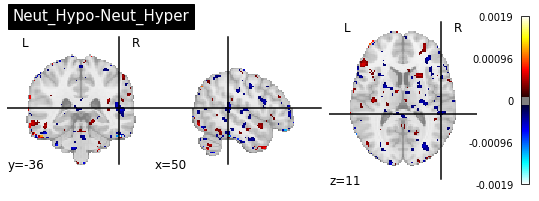

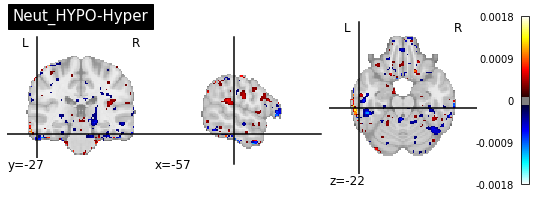

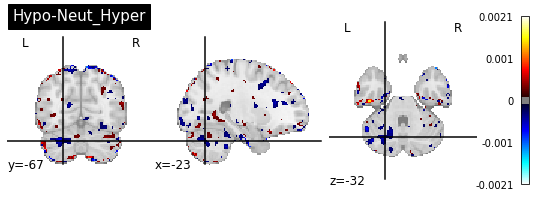

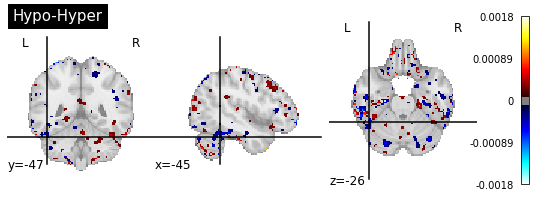

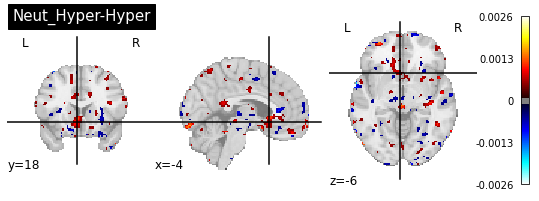

In [9]:
from nilearn import plotting
import nibabel as nib
from nilearn import image
title = ['','Neut_HYPO-HYPO','Neut_Hypo-Neut_Hyper','Neut_HYPO-Hyper', 'Hypo-Neut_Hyper', 'Hypo-Hyper', 'Neut_Hyper-Hyper']

for i in range(1,7):
    
    img = nib.load(f"coefs_whole_brain_{i}.nii.gz")
    tresh_img = image.threshold_img(img, threshold = '99%')
    plotting.plot_stat_map(tresh_img,threshold= 0.0001,title = title[i] )
    #html_view = plotting.view_img(img, vmax=4, cut_coords=[-42, -16, 52], title="shock")

 

## Covariance correction

(Haufe et al., 2014)

That is, the activation pattern can be approximated by calculating the covariance Cov[x(n), y(n)]
(not the correlation Corr[x(n), y(n)]) of each single channel's data with the target variable, 
which amounts to a purely mass-univariate analysis.

For each classification dataset, we computed the mass-univariate correlation Corr[x(n), y(n)] of the class label with each channel reading, as well as the mass-univariate covariance Cov[x(n), y(n)]

In [ ]:
import numpy as np

np.conv(X.transpose(), Y.transpose())[:-1, -1:]

In [12]:
# Covariance matrix
img1 = nib.load(f"coefs_whole_brain_1.nii.gz")
print(img1.shape)

(91, 109, 91)


In [19]:
np_img = np.array(img1.dataobj)
t = np.cov(np_img[1,:,:])
print(np_img[1,:,:].shape)

(109, 91)


In [18]:
t.shape

(109, 109)

In [13]:
import numpy as np
np_img = np.array(img1.dataobj)
cov_mat = np.empty([np_img.shape[0],np_img.shape[1]])
for i in range(np_img.shape[2]):
    slice_cov = np.cov(np_img[i,:,:])
    print(slice_cov.shape)
    cov_mat = np.stack([cov_mat,slice_cov])
    print(cov_mat.shape)


(109, 109)


ValueError: all input arrays must have the same shape